In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [13]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

In [14]:
from costs import *
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    weights = []
    l_tr = []
    l_te = []
    for kInd in range(k):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # get k'th subgroup in test, others in train: TODO
        # ***************************************************
        yTest = y[k_indices[kInd]]
        xTest = x[k_indices[kInd]]
        yTrain = np.delete(y, k_indices[kInd])
        xTrain = np.delete(x, k_indices[kInd])
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form data with polynomial degree: TODO
        # ***************************************************
        txTrain = build_poly(xTrain, degree)
        txTest = build_poly(xTest, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression: TODO
        # ***************************************************
        weights.append(ridge_regression(yTrain, txTrain, lambda_))
        l_tr.append(compute_mse(yTrain, txTrain, weights[kInd]))
        l_te.append(compute_mse(yTest, txTest, weights[kInd]))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    weightAvg = np.mean(weights, axis=0)
    loss_tr = np.mean(l_tr)
    loss_te = np.mean(l_te)
    return loss_tr, loss_te

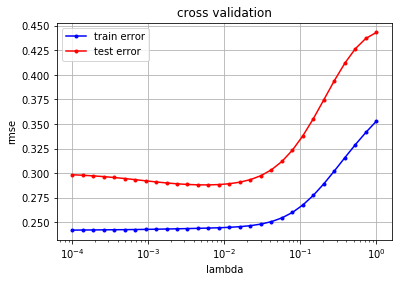

In [15]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    for lambda_ in lambdas:
        loss_tr, loss_te = cross_validation(y, x, k_indices, k_fold, lambda_, degree)
        rmse_tr.append(np.sqrt(2*loss_tr))
        rmse_te.append(np.sqrt(2*loss_te))
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

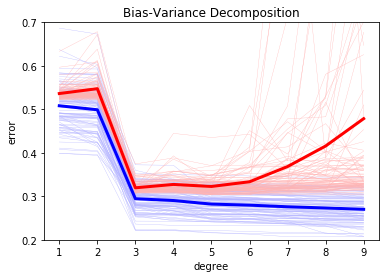

In [16]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        xTrain, xTest, yTrain, yTest = split_data(x, y, ratio_train, seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for index_degree, degree in enumerate(degrees):
            x_tr = build_poly(xTrain, degree)
            x_te = build_poly(xTest, degree)
            weights = least_squares(yTrain, x_tr)
            rmse_tr[index_seed, index_degree] = np.sqrt(2*compute_mse(yTrain, x_tr, weights))
            rmse_te[index_seed, index_degree] = np.sqrt(2*compute_mse(yTest, x_te, weights))
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)
bias_variance_demo()

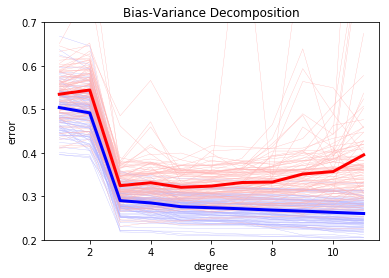

In [29]:
from ridge_regression import *
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 12)
    lambdas = np.logspace(-4, 0, 21)
    k_fold = 4
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        xTrain, xTest, yTrain, yTest = split_data(x, y, ratio_train, seed)
        k_indices = build_k_indices(yTrain, k_fold, seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for index_degree, degree in enumerate(degrees):
            loss_trArr = []
            loss_teArr = []
            for lambda_ in lambdas:
                loss_tr, loss_te = cross_validation(yTrain, xTrain, k_indices, k_fold, lambda_, degree)
                loss_trArr.append(loss_tr)
                loss_teArr.append(loss_te)
            loss_tr = min(loss_trArr)
            loss_te = min(loss_teArr)
            rmse_tr[index_seed, index_degree] = np.sqrt(2*loss_tr)
            rmse_te[index_seed, index_degree] = np.sqrt(2*loss_te)
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)
bias_variance_demo()